In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/jinnn11/Brain-Tumour-Classification.git

Cloning into 'Brain-Tumour-Classification'...
remote: Enumerating objects: 3048, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3048 (delta 2), reused 5 (delta 2), pack-reused 3042
Receiving objects: 100% (3048/3048), 165.51 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (3266/3266), done.


In [3]:
from zipfile import ZipFile

with ZipFile("Brain-Tumour-Classification/archive.zip") as f:
    f.extractall()

In [4]:
import os
for dirpath, dirnames, filenames in os.walk("/content/Brain-Tumour-Classification/Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/Brain-Tumour-Classification/Dataset'.
There are 4 directories and 0 images in '/content/Brain-Tumour-Classification/Dataset/Testing'.
There are 0 directories and 105 images in '/content/Brain-Tumour-Classification/Dataset/Testing/no_tumor'.
There are 0 directories and 74 images in '/content/Brain-Tumour-Classification/Dataset/Testing/pituitary_tumor'.
There are 0 directories and 115 images in '/content/Brain-Tumour-Classification/Dataset/Testing/meningioma_tumor'.
There are 0 directories and 100 images in '/content/Brain-Tumour-Classification/Dataset/Testing/glioma_tumor'.
There are 4 directories and 0 images in '/content/Brain-Tumour-Classification/Dataset/Training'.
There are 0 directories and 395 images in '/content/Brain-Tumour-Classification/Dataset/Training/no_tumor'.
There are 0 directories and 827 images in '/content/Brain-Tumour-Classification/Dataset/Training/pituitary_tumor'.
There are 0 directories and 822 images in '/conten

In [5]:
####NO OF CLASSES
import pathlib

data_dir = pathlib.Path("/content/Brain-Tumour-Classification/Dataset/Training/")
class_names = [item.name for item in data_dir.glob("*")]
class_names

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"shape: {img.shape}")

    return img


In [23]:
train_dir = "/content/Brain-Tumour-Classification/Dataset/Training/"
test_dir = "/content/Brain-Tumour-Classification/Dataset/Testing"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             class_mode="categorical",
                                             batch_size=32)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
len(tf.config.list_physical_devices('GPU'))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


1

In [24]:
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(256,256, 3),
    trainable=False
)

model_4 = Sequential([
    feature_extractor_layer,
    Dense(512, activation='relu'),  # Add your own layers here
    Dropout(0.5),
    Dense(4, activation='softmax')  # Number of output classes
])

model_4.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_4 = model_4.fit(
    train_data,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_data ,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data )
)

Epoch 1/10
90/90 [==============================] - 19s 149ms/step - loss: 0.9733 - accuracy: 0.5885 - val_loss: 1.0771 - val_accuracy: 0.5990
Epoch 2/10
90/90 [==============================] - 12s 135ms/step - loss: 0.6277 - accuracy: 0.7634 - val_loss: 1.0810 - val_accuracy: 0.6015
Epoch 3/10
90/90 [==============================] - 11s 126ms/step - loss: 0.5269 - accuracy: 0.8024 - val_loss: 1.0530 - val_accuracy: 0.6396
Epoch 4/10
90/90 [==============================] - 12s 128ms/step - loss: 0.4725 - accuracy: 0.8279 - val_loss: 0.9462 - val_accuracy: 0.6777
Epoch 5/10
90/90 [==============================] - 11s 118ms/step - loss: 0.4339 - accuracy: 0.8390 - val_loss: 0.9583 - val_accuracy: 0.6827
Epoch 6/10
90/90 [==============================] - 11s 119ms/step - loss: 0.3901 - accuracy: 0.8596 - val_loss: 0.9275 - val_accuracy: 0.6624
Epoch 7/10
90/90 [==============================] - 11s 121ms/step - loss: 0.3610 - accuracy: 0.8749 - val_loss: 0.9617 - val_accuracy: 0.6904

In [25]:
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_url,
    input_shape=(256,256, 3),
    trainable=True
)

model_4 = Sequential([
    feature_extractor_layer,
    Dense(512, activation='relu'),  # Add your own layers here
    Dropout(0.5),
    Dense(4, activation='softmax')  # Number of output classes
])

model_4.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_4 = model_4.fit(
    train_data,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=valid_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(valid_data)
)

Epoch 1/10
90/90 [==============================] - 72s 394ms/step - loss: 0.7067 - accuracy: 0.8129 - val_loss: 1.0474 - val_accuracy: 0.7193
Epoch 2/10
90/90 [==============================] - 30s 331ms/step - loss: 0.3343 - accuracy: 0.9655 - val_loss: 0.5732 - val_accuracy: 0.8702
Epoch 3/10
90/90 [==============================] - 30s 329ms/step - loss: 0.2816 - accuracy: 0.9843 - val_loss: 0.3722 - val_accuracy: 0.9333
Epoch 4/10
90/90 [==============================] - 30s 333ms/step - loss: 0.2693 - accuracy: 0.9854 - val_loss: 0.7815 - val_accuracy: 0.7965
Epoch 5/10
90/90 [==============================] - 30s 327ms/step - loss: 0.2473 - accuracy: 0.9948 - val_loss: 0.3266 - val_accuracy: 0.9509
Epoch 6/10
90/90 [==============================] - 30s 332ms/step - loss: 0.2869 - accuracy: 0.9787 - val_loss: 0.3925 - val_accuracy: 0.9333
Epoch 7/10
90/90 [==============================] - 31s 348ms/step - loss: 0.2628 - accuracy: 0.9906 - val_loss: 0.2768 - val_accuracy: 0.9895

In [26]:
import pandas as pd
history_4_df = pd.DataFrame(history_4.history)

<Axes: >

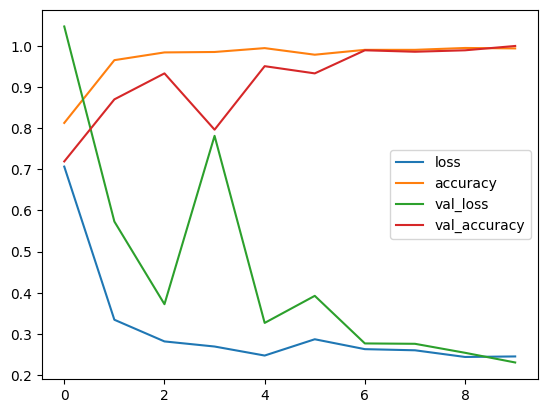

In [27]:
history_4_df.plot()

In [29]:
model_4.save("model_4_final.keras")